In [7]:
# -*- coding: utf-8 -*-
"""
Created on Thu 8-Oct-2021

Link :
    Rnd Forestregression model : https://levelup.gitconnected.com/random-forest-regression-209c0f354c84
    Onehot encoder : https://towardsdatascience.com/columntransformer-in-scikit-for-labelencoding-and-onehotencoding-in-machine-learning-c6255952731b
                     https://stackoverflow.com/questions/58087238/valueerror-setting-an-array-element-with-a-sequence-when-using-onehotencoder-on

@author: 41162395
"""


# from numpy import array
# from scipy.sparse import csr_matrix
import numpy as np
import pandas as pd
import seaborn as sns
#import matplotlib.pyplot as plt
#import matplotlib.gridspec as gridspec
#from sklearn.ensemble import IsolationForest
#from sklearn.preprocessing import MinMaxScaler


In [19]:
# Import raw dataset to pandas dataframe
df_org = pd.read_csv('TMC_Report 6-current 1.csv')
#df = pd.read_csv('TMC_Report 6-current 1.csv')


In [20]:
df = df_org[["DATE","TESTER_ID","handler_id","product_no","TEST_CODE","QTY_IN","QTY_OUT","UPH"]]

In [21]:
df

,DATE,TESTER_ID,handler_id,product_no,TEST_CODE,QTY_IN,QTY_OUT,UPH
0,06/01/2024,ADVT2000-10,NS8160-18,UTIC*TT3920D,FT,10608,8234,2209.00
1,06/01/2024,ADVT2000-10,NS8160-18,UTIC*TT3920D,FT,448,416,504315.00
2,06/01/2024,ADVT2000-12,EXCEED8016-52,4NB0*MY1UABA,QT-RT,0,0,0.00
3,06/01/2024,ADVT2000-12,EXCEED8016-52,4NB0*MY1UABA,FT,0,0,0.00
4,06/01/2024,ADVT2000-12,EXCEED8016-52,4NB0*MY1UABA,FT-RT,0,0,0.00
...,...,...,...,...,...,...,...,...
172004,09/21/2024,TMT-309,NX116-15,AMDG2730DN-J-GE4,FT,18491,18004,3799.00
172005,09/21/2024,TMT-46,NX116-16,AMDG2730DN-J-GE4,FT,16181,15888,4280.00
172006,09/21/2024,TMT-46,NX116-16,AMDG2730DN-J-GE4,FT,25767,25722,4406.00
172007,09/21/2024,TMT-96,NX116-27,AMDG2730DN-J-GE4,FT,15922,15296,4685.45


In [22]:
# Input json for prediction 
#dfx = pd.read_json('x_input.json')  



In [44]:
# using time module
import time

# ts stores the time in seconds
tstart = time.time()

# print the current timestamp
print(tstart)

1727337276.8126833


In [28]:
# One hot encoder to numpy array X as below 8 columns or features
# "DATE","TESTER_ID","handler_id","product_no","TEST_CODE","QTY_IN","QTY_OUT","UPH"
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(handle_unknown='ignore'), [0,1,2,3,4])], remainder='passthrough')
X = ct.fit_transform(df).toarray()  # upper case 'X'
#X0 = ct.transform(dfx).toarray()  # upper case 'X0'


In [29]:
X.shape

(172009, 3012)

In [31]:
# Split X to 2 arrays as x inputFeatures and y outputResponse
selector = [i for i in range(X.shape[1]) if i != 3011] #Except last column
x = X[:,selector]  # lower case 'x'  all column except 'UPH'
y = X[:,3011]  # lower case 'y'  for 'UPH'


In [32]:
# Splitting the dataset into the Training set and Test set"""
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)



In [33]:
# Random Forest Regressor Algorithm 
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=10, random_state=(0))
regressor.fit(X_train, y_train)



RandomForestRegressor(n_estimators=10, random_state=0)

In [34]:
# Predicting the results of the Test set
y_pred = regressor.predict(X_test)
#y_pred_2 = np.ravel(y_pred)  # Reduce shape of y_pred
compare = pd.DataFrame(y_test)
compare['y_pred'] = y_pred.tolist()
compare.to_csv('compare.csv',index=False)



In [35]:
# printing the results of the current iteration
np.set_printoptions(precision=2)
compare = np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1)
print(compare)
MAPE = np.mean(100 * (np.abs(y_test-regressor.predict(X_test))/y_test))
print('Accuracy:', 100-MAPE)



[[ 691.46 1027.33]
 [ 807.4   650.  ]
 [4136.5  4853.  ]
 ...
 [2304.7  2377.  ]
 [2761.2  2668.  ]
 [3027.   1959.  ]]
Accuracy: nan


C:\Users\RYZEN\AppData\Local\Temp\ipykernel_7788\3145379175.py:5: RuntimeWarning: divide by zero encountered in divide
  MAPE = np.mean(100 * (np.abs(y_test-regressor.predict(X_test))/y_test))
C:\Users\RYZEN\AppData\Local\Temp\ipykernel_7788\3145379175.py:5: RuntimeWarning: invalid value encountered in divide
  MAPE = np.mean(100 * (np.abs(y_test-regressor.predict(X_test))/y_test))


In [47]:
#add 'Y' array as new column in df DataFrame
PRED = regressor.predict(x)
PRED_2 = np.ravel(PRED)  # Reduce shape of y_pred
df['PRED'] = PRED_2.tolist()
#Export output to csv
df.to_csv('Test_UPH_regression.csv',index = False)


C:\Users\RYZEN\AppData\Local\Temp\ipykernel_7788\2945225883.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['PRED'] = PRED_2.tolist()


<Axes: xlabel='UPH', ylabel='PRED'>

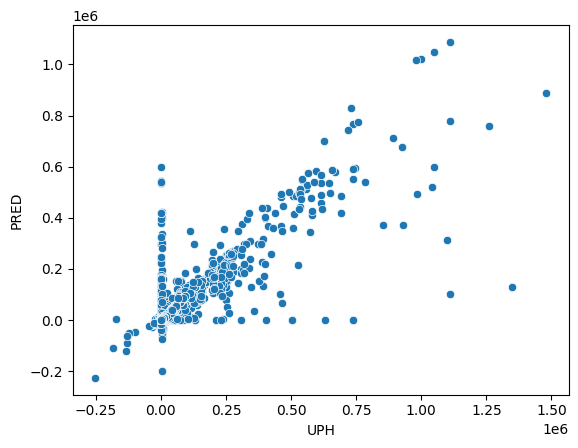

In [38]:
sns.scatterplot(x='UPH', y='PRED', data=df)

In [39]:
df

,DATE,TESTER_ID,handler_id,product_no,TEST_CODE,QTY_IN,QTY_OUT,UPH,PRED
0,06/01/2024,ADVT2000-10,NS8160-18,UTIC*TT3920D,FT,10608,8234,2209.00,1935.905
1,06/01/2024,ADVT2000-10,NS8160-18,UTIC*TT3920D,FT,448,416,504315.00,1915.500
2,06/01/2024,ADVT2000-12,EXCEED8016-52,4NB0*MY1UABA,QT-RT,0,0,0.00,0.000
3,06/01/2024,ADVT2000-12,EXCEED8016-52,4NB0*MY1UABA,FT,0,0,0.00,0.000
4,06/01/2024,ADVT2000-12,EXCEED8016-52,4NB0*MY1UABA,FT-RT,0,0,0.00,0.000
...,...,...,...,...,...,...,...,...,...
172004,09/21/2024,TMT-309,NX116-15,AMDG2730DN-J-GE4,FT,18491,18004,3799.00,3911.296
172005,09/21/2024,TMT-46,NX116-16,AMDG2730DN-J-GE4,FT,16181,15888,4280.00,4307.600
172006,09/21/2024,TMT-46,NX116-16,AMDG2730DN-J-GE4,FT,25767,25722,4406.00,4327.800
172007,09/21/2024,TMT-96,NX116-27,AMDG2730DN-J-GE4,FT,15922,15296,4685.45,4439.100


C:\Users\RYZEN\.conda\envs\py310\lib\site-packages\seaborn\axisgrid.py:1883: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(x=self.x, ax=self.ax_marg_x, **kwargs)
C:\Users\RYZEN\.conda\envs\py310\lib\site-packages\seaborn\axisgrid.py:1889: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  func(y=self.y, ax=self.ax_marg_y, **kwargs)


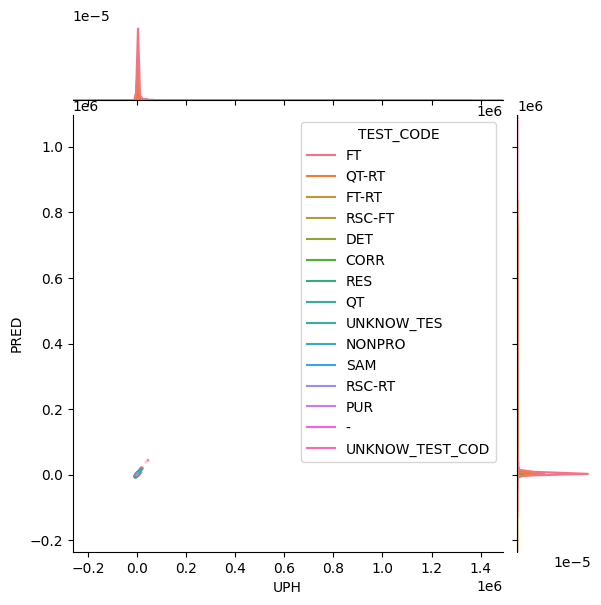

In [40]:
# Show the joint distribution using kernel density estimation
g = sns.jointplot(
    data=df,
    x="UPH", y="PRED", hue="TEST_CODE",
    kind="kde",
)

In [46]:
tstop = time.time()

# print the current timestamp
print(tstop)
print((tstop-tstart)/3600,"hrs")

1727337320.3942258
0.012105984025531345 hrs


In [ ]:
#############################
# Common command 
#-------------------------
# df.describe
# df.info()
# df.index
# df.columns
# dfx[:5]
# du1=ds1.unstack()
# df.isna().sum()
# dfx = df.set_index(['C_RISTIC','PT','Parameter.CreateTime','Parameter.BondType','Parameter.No'])
# df.loc[25024]
# for i in range (len(Y)):
#     if Y[i] == -1:
#         print (df.loc[i])
#
# selected_columns = df[["col1","col2"]]
# new_df = selected_columns.copy()
#
# sns.scatterplot(x='sepal_length', y='sepal_width', hue='class', data=iris)
# sns.scatterplot(x='MEANX', y='SD', data=temp)
#
# df0 = pd.read_json(jsonstr,orient="index")
# df0 = pd.read_json('input.json',orient="index")
# df0.drop(to_drop, inplace=True)
# df0 = df0.transpose()
# 
# df_org[Y==-1]  #List Row for Y = -1 
#
# df0 = df[:1]  #For dummy prediction of testing data
# df0json = df0.to_json()
# file1 = open("x_input.json","w")
# file1.writelines(df0json)
# file1.close() 
#
# df.groupby('C_RISTIC').count()    #pandas count categories
# df.groupby('Parameter.Group').count()
#
# cpare = pd.DataFrame(compare)    #np array to dataframe
# cpare.to_csv('compare.csv')
#
# df.rename(columns={"A": "a", "B": "c"})

